# Legolas Demo Code

Use this code to test your calibration values and as a reference for solving the challenges

In [12]:
import sys
print(sys.version)

3.12.3 | packaged by Anaconda, Inc. | (main, May  6 2024, 19:42:21) [MSC v.1916 64 bit (AMD64)]


In [1]:
from core import *
import utils

No GPU available, using the CPU instead.


In [2]:
# cell 3. this is how you reset the rpyc server when facing the port already in use
# need to change to actual host name
host_1 = "192.168.1.11"
host_2 = "192.168.1.12"

utils.restart_server(host=host_1)
utils.restart_server(host=host_2)

kill server at PID:510
restarting the rpyc server at host: 192.168.1.11
rpyc server start successfully
kill server at PID:466
restarting the rpyc server at host: 192.168.1.12
rpyc server start successfully


In [30]:
# cell 4
stage, depo_device, pH_device, conn1, conn2, config = load_from_config("final_config.yaml")

buildhat.exc.DeviceError: Port already used

========= Remote Traceback (1) =========
Traceback (most recent call last):
  File "/home/greenleaf/.local/lib/python3.9/site-packages/rpyc/core/protocol.py", line 369, in _dispatch_request
    res = self._HANDLERS[handler](self, *args)
  File "/home/greenleaf/.local/lib/python3.9/site-packages/rpyc/core/protocol.py", line 863, in _handle_call
    return obj(*args, **dict(kwargs))
  File "/home/greenleaf/.local/lib/python3.9/site-packages/buildhat/force.py", line 21, in __init__
    super().__init__(port)
  File "/home/greenleaf/.local/lib/python3.9/site-packages/buildhat/devices.py", line 56, in __init__
    raise DeviceError("Port already used")
buildhat.exc.DeviceError: Port already used


In [ ]:
# it is ok if this fails, just move on to the next code block
sanity_check(stage=stage, pH_device=pH_device, depo_device=depo_device)

In [16]:
# find the usb port if problem occur
list_ports = conn1.modules['serial.tools.list_ports']

ports=list_ports.comports()
for port, desc, hwid in sorted(ports):
    print(port, desc, hwid)

/dev/ttyACM0 ttyACM0 USB VID:PID=2341:0043 SER=24238313635351315170 LOCATION=1-1.3:1.0


## Test Device Functionality

In [28]:
stage.home()

(281, 503)

In [ ]:
# Go to Home Position
reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
# stage.home()

In [ ]:
# Drop pH meter and raise it up (don't run if pH path is obstructed)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
# Drop deposition device and raise it up (don't run if syringe path is obstructed)
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

## Testing OpenCV

In [32]:
from core import *
import utils
stage, depo_device, pH_device, conn1, conn2, config = load_from_config('final_config.yaml')

moving to cell


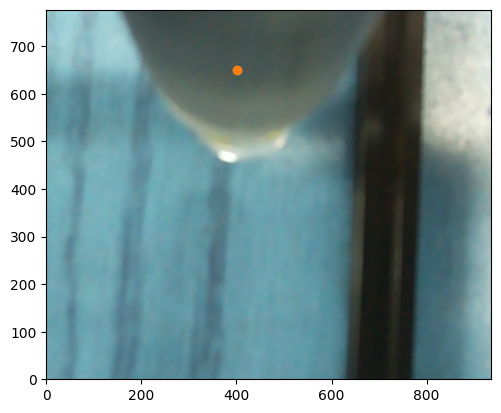

IndexError: list index out of range

In [33]:
# moves then takes snapshot
stage.home()
stage.move_to_cell(0,0)

In [ ]:
stage.move_to_cell(2, 4)

In [ ]:
stage.move_to_cell(1, 3)

In [ ]:
stage.move_to_cell(2,3)

## Test Cell Mapping and Accuracy
Use this code to see if pH device is aligning with the cell map properly

If calibrated properly with the pH sensor, "stage" and "pH_device" will move the cart to the same spot

In [ ]:
#stage.get_XYloc()

In [ ]:
stage.move_to_cell(0,0)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
stage.move_to_cell(3, 5)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
stage.move_to_cell(3, 0)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
stage.move_to_cell(0, 5)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
stage.move_to_loc("clean")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

## Test pH device and Syringe Functionality

In [ ]:
# this is the pH meter
pH_device

In [ ]:
# the cleaning location can be used to wash off any acidic or basic solution from the probe prior to measurements
# it is not necessary to use this in your code, but if you are getting incorrect pH values you may need to clean with DI
pH_device.move_to_loc("clean")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
# this runs the pH measuring loop, where the value passed to the function is the amount of time spent in the well
# it is suggested to measure for at least 20 seconds to let the pH measurement stabilize
pH_device.move_to_cell(row=0, col=0)
pH_device.pH_measure(20)

In [ ]:
# this is the syringe
depo_device

In [ ]:
# go to acid well and test range of motion
depo_device.move_to_loc("acid")
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

In [ ]:
# acquire 0.5 mL from the acid reservoir
depo_device.acquire(0.6, location="acid")

In [ ]:
# deposit the 0.5 mL into the 0,0 sample well
depo_device.deposition(0.6, row=0, col=0)

## Example Loops

Use these loops as a reference for ways to construct your autonomous experiments and the functions needed

In [ ]:
depo_device.acquire(0.6, location="acid")
depo_device.deposition(0.1, row=0, col=1)
depo_device.deposition(0.2, row=0, col=2)
depo_device.deposition(0.3, row=0, col=3)

In [ ]:
depo_device.to_zpos("full_up")

In [ ]:
for row in range(4):
    for col in range(6):
        depo_device.acquire(0.6, location="acid")
        depo_device.deposition(0.6, row=row, col=col)
        pH_device.move_to_cell(row=row, col=col)
        pH = pH_device.pH_measure(stable_time=1)
        print(f"row {row} col {col} pH {pH}")

In [ ]:
#pH_device.pH_positions

In [ ]:
#pH_device.motor_pH.get_position()

In [ ]:
row = 5
for col in range(8):
    depo_device.acquire(0.6, location="acid")
    depo_device.deposition(0.6, row=row, col=col)
    pH_device.move_to_cell(row=row, col=col)
    pH = pH_device.pH_measure(stable_time=20)
    print(f"row {row} col {col} pH {pH}")